In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
df = pd.read_parquet('DadosFinais/df_final.parquet.gzip', engine='pyarrow')

### Normalização e divisão dos dados

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
df.columns

Index(['Data', 'Demanda_Max', 'valor', 'Sem ajuste sazonal', 'População',
       'Com Feriado', 'Sunday', 'Saturday', 'Dia de Semana', 'Temperatura_Max',
       'Umidade_Max', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Demanda_Min', 'Temperatura_Min', 'Umidade_Min', 'Demanda_Med',
       'Temperatura_Med', 'Umidade_Med'],
      dtype='object')

In [5]:
X = df[['valor', 'Sem ajuste sazonal', 'População', 'Com Feriado', 'Sunday', 'Saturday',
                 'Dia de Semana', 'Temperatura_Max', 'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
                   'Umidade_Med','April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September']]

In [6]:
Y = df[['Demanda_Max', 'Demanda_Min', 'Demanda_Med']]

In [7]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [8]:
#Dividir entre dataset de treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

In [10]:
X_train_std.head()

,valor,Sem ajuste sazonal,População,Com Feriado,Sunday,Saturday,Dia de Semana,Temperatura_Max,Umidade_Max,Temperatura_Min,...,December,February,January,July,June,March,May,November,October,September
1279,-0.396642,0.345395,-1.212379,-0.191954,-0.408339,-0.408021,0.632329,-1.084389,-0.858791,-1.799940,...,-0.300694,-0.2969,-0.312257,3.325644,-0.295374,-0.312257,-0.300694,-0.295374,-0.300694,-0.295374
4924,-0.010653,-0.873083,1.323869,-0.191954,-0.408339,-0.408021,0.632329,-2.222748,0.105056,-2.256186,...,-0.300694,-0.2969,-0.312257,-0.300694,3.385543,-0.312257,-0.300694,-0.295374,-0.300694,-0.295374
3841,0.139165,-1.232247,0.808539,-0.191954,-0.408339,-0.408021,0.632329,-0.904411,0.602526,-1.595580,...,-0.300694,-0.2969,-0.312257,3.325644,-0.295374,-0.312257,-0.300694,-0.295374,-0.300694,-0.295374
5123,-0.137582,-1.646761,1.484390,-0.191954,-0.408339,2.450856,-1.581456,0.922362,1.068903,0.928030,...,-0.300694,-0.2969,3.202486,-0.300694,-0.295374,-0.312257,-0.300694,-0.295374,-0.300694,-0.295374
3904,-0.128218,-1.210558,0.808539,-0.191954,-0.408339,-0.408021,0.632329,-0.117009,0.353791,-0.735367,...,-0.300694,-0.2969,-0.312257,-0.300694,-0.295374,-0.312257,-0.300694,-0.295374,-0.300694,3.385543


### Random Forest

**Dados não normalizados**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [12]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [13]:
y_pred = RF_regressor.predict(X_val)
y_pred[:10]

array([[3831.65      , 2080.35      , 2727.99252566],
       [4753.195     , 2493.095     , 3874.19214583],
       [4738.28      , 2569.815     , 3842.90522917],
       [4111.87      , 2594.6       , 3415.94519528],
       [4018.97      , 2368.4       , 3321.52904229],
       [3427.895     , 1813.44      , 2363.07447222],
       [4466.9       , 2538.37      , 3335.56302083],
       [4653.17      , 2519.565     , 3789.62842014],
       [4484.665     , 2547.36      , 3663.12257639],
       [5248.08      , 3085.01      , 4269.2789296 ]])

In [14]:
y_val[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
3836,3871.0,2127.0,2753.379861
2010,4799.0,2304.0,3846.563889
4931,4864.0,2496.0,3838.936111
52,4149.0,2716.0,3524.946528
1047,3891.0,2370.0,3278.575694
875,3379.0,1922.0,2388.768056
2008,4568.0,2476.0,3424.658333
3096,4831.0,2586.0,3907.106944
4342,4833.0,2885.0,3914.945139
4082,5484.0,2870.0,4310.651389


#### Avaliação do Modelo

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, explained_variance_score

In [16]:
print('MAE:',mean_absolute_error(y_val, y_pred))
MSE = mean_squared_error(y_val, y_pred)
print('RMSE:', np.sqrt(MSE))
R2 = r2_score(y_val, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val, y_pred))

MAE: 141.918676283572
RMSE: 205.20021926185012
R2 Score: 0.8562977264120026
Adj R2 Score 0.8550661333918792
Variance Score: 0.8564002355675674


Text(0.5, 1.0, 'Importância de cada feature')

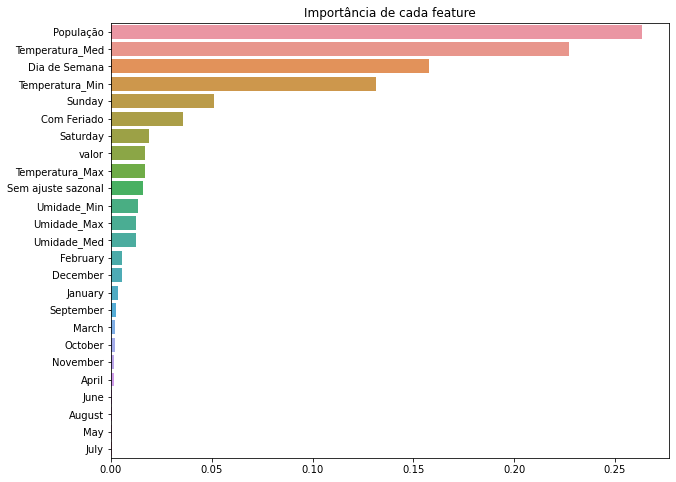

In [17]:
plt.figure(figsize=(10,8 ));
importances = pd.Series(data=RF_regressor.feature_importances_, index=['valor', 'Sem ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

**Com dados normalizados**

In [18]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [19]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[3842.955     , 2074.53      , 2729.7039375 ],
       [4725.185     , 2497.71      , 3865.15285417],
       [4732.52      , 2531.875     , 3833.09529514],
       [4092.805     , 2551.29      , 3375.48856047],
       [4022.16      , 2378.355     , 3326.78436174],
       [3430.075     , 1811.16      , 2361.13056597],
       [4487.02      , 2549.2       , 3354.51791667],
       [4651.76      , 2528.505     , 3792.79979861],
       [4506.005     , 2562.845     , 3672.95176736],
       [5248.145     , 3074.025     , 4257.37347222]])

In [20]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
3836,3871.0,2127.0,2753.379861
2010,4799.0,2304.0,3846.563889
4931,4864.0,2496.0,3838.936111
52,4149.0,2716.0,3524.946528
1047,3891.0,2370.0,3278.575694
875,3379.0,1922.0,2388.768056
2008,4568.0,2476.0,3424.658333
3096,4831.0,2586.0,3907.106944
4342,4833.0,2885.0,3914.945139
4082,5484.0,2870.0,4310.651389


**Avaliação do modelo**

In [21]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std, y_pred))

MAE: 141.47190039412502
RMSE: 204.50640078210805
R2 Score: 0.8571278061476457
Adj R2 Score 0.8559033272836386
Variance Score: 0.8572417853868058


**Avaliação para demanda máxima**

In [23]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_val_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Max'], y_pred[:,0]))

MAE: 139.70659072921026
RMSE: 211.47793881551343
R2 Score: 0.8734634560543006
Adj R2 Score 0.8723789810461956
Variance Score: 0.8735859153855976


**Avaliação para demanda média**

In [24]:
#Demanda Média
print('MAE:',mean_absolute_error(y_val_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_val_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Med'], y_pred[:,2]))

MAE: 129.33677753548807
RMSE: 188.91085679475367
R2 Score: 0.8956590949161964
Adj R2 Score 0.8947648465010113
Variance Score: 0.8956593715106618


**Avaliação para demanda mínima**

In [25]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_val_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Min'], y_pred[:,1]))

MAE: 155.37233291767632
RMSE: 212.26957733497903
R2 Score: 0.80226086747244
Adj R2 Score 0.8005661543037087
Variance Score: 0.8024800692641582


Text(0.5, 1.0, 'Importância de cada feature')

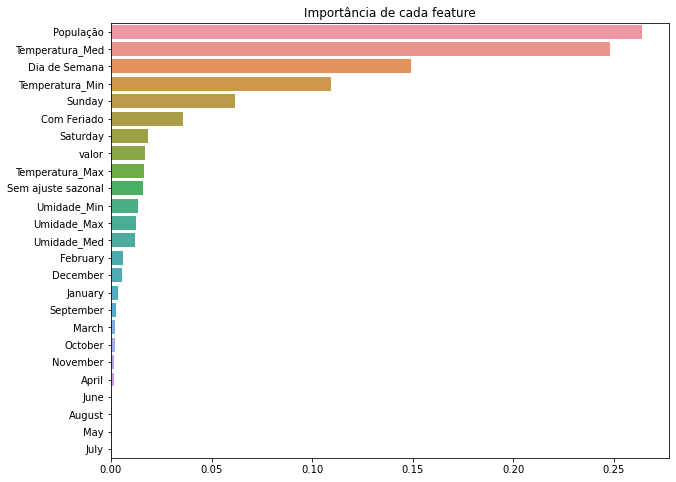

In [26]:
plt.figure(figsize=(10,8 ));
importances = pd.Series(data=RF_regressor.feature_importances_, index=['valor', 'Sem ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

### Treinar o modelo com os dados de validação + treino

In [27]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [28]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train_std, y_train_std)
y_pred = RF_regressor.predict(X_test_std)

**Avaliação para Demanda Máxima**

In [29]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test_std['Demanda_Max'], y_pred[:,0]))

MAE: 141.90434958339384
RMSE: 208.69018505965892
R2 Score: 0.8728048120344186
Adj R2 Score 0.8717146921512717
Variance Score: 0.8728353945350467


**Avaliação para Demanda Média**

In [30]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test_std['Demanda_Med'], y_pred[:,2]))

MAE: 124.48713197593258
RMSE: 182.2388414862562
R2 Score: 0.9016634132071927
Adj R2 Score 0.9008206244962499
Variance Score: 0.9016773233052123


**Avaliação para Demanda Mínima**

In [31]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test_std['Demanda_Min'], y_pred[:,1]))

MAE: 150.37488316047316
RMSE: 202.59977789051067
R2 Score: 0.8229187337404498
Adj R2 Score 0.8214010677629082
Variance Score: 0.8230311177039444


### SVR

Com o SVR não é possível prever as 3 demandas de apenas uma vez. Para esse algoritmo será utilizado apenas os dados normalizados, pela maneira como ele funciona.

In [32]:
from sklearn.svm import SVR

In [42]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

**Previsão da demanda máxima**

In [36]:
#svr_rbf = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               #coef0=1)
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train_std,y_train_std['Demanda_Max'])
y_pred_max = svr_max.predict(X_val_std)

**Avaliação do modelo**

In [37]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_val['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_val['Demanda_Max'], y_pred_max)
#print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))
#print('MSE log error:', mean_squared_log_error(y_res_val['Demanda_Max'], y_pred))
R2 = r2_score(y_val['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val['Demanda_Max'], y_pred_max))

Predição Demanda Máxima
MAE: 128.63210407107178
RMSE: 196.89274498688474
R2 Score: 0.8903155003931581
Adj R2 Score 0.8893754549731474
Variance Score: 0.891109571113004


**Previsão da demanda média**

In [38]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train_std,y_train_std['Demanda_Med'])
y_pred_med = svr_med.predict(X_val_std)

**Avaliação do modelo**

In [39]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_val['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_val['Demanda_Med'], y_pred_med)
#print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))
#print('MSE log error:', mean_squared_log_error(y_res_val['Demanda_Max'], y_pred))
R2 = r2_score(y_val['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val['Demanda_Max'], y_pred_med))

Predição Demanda Média
MAE: 107.40733269642931
RMSE: 161.56928716381054
R2 Score: 0.9236764817020533
Adj R2 Score 0.9230223548739941
Variance Score: 0.8360567613085453


**Previsão da demanda mínima**

In [40]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train_std,y_train_std['Demanda_Min'])
y_pred_min = svr_min.predict(X_val_std)

**Avaliação do modelo**

In [41]:
print('Predição Demanda Mínima')
print('MAE:',mean_absolute_error(y_val['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_val['Demanda_Min'], y_pred_min)
#print('MSE:',MSE)
print('RMSE:',np.sqrt(MSE))
#print('MSE log error:', mean_squared_log_error(y_res_val['Demanda_Max'], y_pred))
R2 = r2_score(y_val['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val['Demanda_Max'], y_pred_max))

Predição Demanda Mínima
MAE: 129.5828016352831
RMSE: 177.8285382581093
R2 Score: 0.8612221894377439
Adj R2 Score 0.8600328012772858
Variance Score: 0.891109571113004


### Treinamento do modelo com dados de treino + validação

In [54]:
#Dividir entre dataset de treino e teste dados normalizados
X_train,X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [55]:
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train,y_train['Demanda_Max'])
y_pred_max = svr_max.predict(X_test)

In [56]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train,y_train['Demanda_Med'])
y_pred_med = svr_med.predict(X_test)

In [57]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train,y_train['Demanda_Min'])
y_pred_min = svr_min.predict(X_test)

**Avaliação com o dataset de teste**

In [58]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred_max)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Max'], y_pred_max))

Predição Demanda Máxima
MAE: 130.06139186820138
RMSE: 192.07452440525057
R2 Score: 0.8922527570715186
Adj R2 Score 0.8915618924720798
Variance Score: 0.8925050720715665


In [60]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred_med)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Med'], y_pred_med))

Predição Demanda Média
MAE: 109.92699167927633
RMSE: 158.96610359208216
R2 Score: 0.9251757629652022
Adj R2 Score 0.9246959974032967
Variance Score: 0.925622602018706


In [62]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred_min)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Min'], y_pred_min))

Predição Demanda Máxima
MAE: 129.1442751244768
RMSE: 177.40663710934976
R2 Score: 0.8642204340142926
Adj R2 Score 0.8633498289489829
Variance Score: 0.8647656322517575


### Rede Neural

In [63]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense

In [64]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [65]:
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2

Using TensorFlow backend.


**Divisão dos dados**

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

**Previsão de todas as demandas juntas**

In [67]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=25, kernel_initializer='orthogonal', activation='relu'))
model_2.add(Dense(32, activation='relu', activity_regularizer =l1(0.001))) ##Melhorou um pouco com a regularização
model_2.add(Dense(3, activation='linear'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_2.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=1, validation_split=0.2)
#,  callbacks=[callback])

Train on 3140 samples, validate on 785 samples
Epoch 1/200
3140/3140 [==============================] - 2s 532us/sample - loss: 12958632.9541 - mse: 12958633.0000 - mae: 3478.7012 - val_loss: 11864758.7975 - val_mse: 11864759.0000 - val_mae: 3320.9009
Epoch 2/200
3140/3140 [==============================] - 1s 179us/sample - loss: 7852508.9742 - mse: 7852509.0000 - mae: 2616.0903 - val_loss: 3715744.7143 - val_mse: 3715742.2500 - val_mae: 1702.6534
Epoch 3/200
3140/3140 [==============================] - 1s 180us/sample - loss: 1837854.2447 - mse: 1837851.2500 - mae: 1108.0699 - val_loss: 1118316.4145 - val_mse: 1118312.8750 - val_mae: 858.8264
Epoch 4/200
3140/3140 [==============================] - 1s 179us/sample - loss: 753930.1082 - mse: 753926.8750 - mae: 687.3504 - val_loss: 601317.7312 - val_mse: 601314.2500 - val_mae: 612.3795
Epoch 5/200
3140/3140 [==============================] - 1s 179us/sample - loss: 426296.1796 - mse: 426292.5312 - mae: 503.6187 - val_loss: 374191.7872 

3140/3140 [==============================] - 1s 182us/sample - loss: 35063.8167 - mse: 35060.1875 - mae: 136.6124 - val_loss: 38613.3372 - val_mse: 38609.7070 - val_mae: 147.2263
Epoch 44/200
3140/3140 [==============================] - 1s 178us/sample - loss: 34964.4081 - mse: 34960.7852 - mae: 136.5339 - val_loss: 38027.1662 - val_mse: 38023.5352 - val_mae: 145.4408
Epoch 45/200
3140/3140 [==============================] - 1s 179us/sample - loss: 34704.4528 - mse: 34700.8242 - mae: 135.9283 - val_loss: 38197.4818 - val_mse: 38193.8633 - val_mae: 145.3344
Epoch 46/200
3140/3140 [==============================] - 1s 179us/sample - loss: 34544.0374 - mse: 34540.4336 - mae: 136.1489 - val_loss: 38674.0986 - val_mse: 38670.4648 - val_mae: 146.5713
Epoch 47/200
3140/3140 [==============================] - 1s 187us/sample - loss: 34259.9758 - mse: 34256.3516 - mae: 135.4562 - val_loss: 38933.1837 - val_mse: 38929.5664 - val_mae: 147.4631
Epoch 48/200
3140/3140 [=============================

Epoch 86/200
3140/3140 [==============================] - 1s 181us/sample - loss: 30400.2345 - mse: 30396.5996 - mae: 124.8835 - val_loss: 35596.7495 - val_mse: 35593.1094 - val_mae: 138.6965
Epoch 87/200
3140/3140 [==============================] - 1s 184us/sample - loss: 30527.8277 - mse: 30524.1934 - mae: 125.2660 - val_loss: 34549.2549 - val_mse: 34545.6016 - val_mae: 135.0551
Epoch 88/200
3140/3140 [==============================] - 1s 180us/sample - loss: 30427.0905 - mse: 30423.4570 - mae: 124.8913 - val_loss: 34939.6046 - val_mse: 34935.9531 - val_mae: 136.9861
Epoch 89/200
3140/3140 [==============================] - 1s 179us/sample - loss: 30108.3775 - mse: 30104.7305 - mae: 124.2938 - val_loss: 34646.9229 - val_mse: 34643.2734 - val_mae: 136.0138
Epoch 90/200
3140/3140 [==============================] - 1s 177us/sample - loss: 30268.5059 - mse: 30264.8711 - mae: 124.8042 - val_loss: 35747.7032 - val_mse: 35744.0703 - val_mae: 139.4917
Epoch 91/200
3140/3140 [================

3140/3140 [==============================] - 1s 181us/sample - loss: 28588.9711 - mse: 28585.3379 - mae: 120.1758 - val_loss: 34080.6013 - val_mse: 34076.9492 - val_mae: 134.2199
Epoch 129/200
3140/3140 [==============================] - 1s 184us/sample - loss: 28540.4504 - mse: 28536.8145 - mae: 120.1403 - val_loss: 34652.1892 - val_mse: 34648.5508 - val_mae: 136.7741
Epoch 130/200
3140/3140 [==============================] - 1s 175us/sample - loss: 28529.3088 - mse: 28525.6680 - mae: 120.5904 - val_loss: 34395.9139 - val_mse: 34392.2656 - val_mae: 134.6742
Epoch 131/200
3140/3140 [==============================] - 1s 173us/sample - loss: 28545.7073 - mse: 28542.0762 - mae: 120.3378 - val_loss: 34381.6039 - val_mse: 34377.9531 - val_mae: 134.7551
Epoch 132/200
3140/3140 [==============================] - 1s 180us/sample - loss: 28720.4106 - mse: 28716.7773 - mae: 120.7973 - val_loss: 34141.2583 - val_mse: 34137.6016 - val_mae: 133.3987
Epoch 133/200
3140/3140 [========================

3140/3140 [==============================] - 1s 175us/sample - loss: 27609.7841 - mse: 27606.1367 - mae: 118.1738 - val_loss: 34982.3997 - val_mse: 34978.7656 - val_mae: 137.7892
Epoch 171/200
3140/3140 [==============================] - 1s 178us/sample - loss: 27648.4913 - mse: 27644.8457 - mae: 118.2252 - val_loss: 33585.6423 - val_mse: 33581.9844 - val_mae: 132.3583
Epoch 172/200
3140/3140 [==============================] - 1s 181us/sample - loss: 27654.1780 - mse: 27650.5469 - mae: 117.8521 - val_loss: 33404.2657 - val_mse: 33400.6016 - val_mae: 132.0129
Epoch 173/200
3140/3140 [==============================] - 1s 189us/sample - loss: 27718.8218 - mse: 27715.1855 - mae: 118.3415 - val_loss: 33469.4979 - val_mse: 33465.8516 - val_mae: 133.5041
Epoch 174/200
3140/3140 [==============================] - 1s 166us/sample - loss: 27621.4969 - mse: 27617.8633 - mae: 118.0139 - val_loss: 33321.3552 - val_mse: 33317.7031 - val_mae: 132.2389
Epoch 175/200
3140/3140 [========================

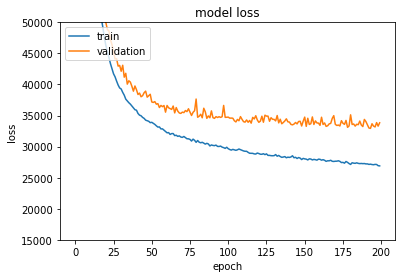

In [69]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((15000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
model_2.evaluate(X_test, y_test, batch_size=16)

1309/1309 [==============================] - 0s 92us/sample - loss: 32660.3310 - mse: 32656.6660 - mae: 130.5303


[32660.330989782276, 32656.666, 130.53026]

In [74]:
y_pred = model_2.predict(X_test_std)
y_pred[10:20]

array([[4698.622 , 2695.7263, 3845.7512],
       [4204.703 , 2237.8318, 3020.3298],
       [5740.028 , 3609.5935, 4718.377 ],
       [4420.632 , 2560.5251, 3636.0464],
       [4460.9478, 2848.9255, 3722.4485],
       [4633.5767, 2714.4382, 3811.5105],
       [5161.077 , 3452.873 , 4283.2554],
       [3497.3884, 1793.9955, 2337.0461],
       [4861.1113, 3118.7446, 4066.3186],
       [3461.2986, 2114.8447, 2573.3933]], dtype=float32)

In [75]:
y_test_std[10:20]

,Demanda_Max,Demanda_Min,Demanda_Med
4855,4669.0,2855.0,3945.909722
4536,4103.0,2029.0,2836.381944
3694,5956.0,3760.0,4836.107639
4338,4625.0,2811.0,3862.999306
1515,4583.0,3049.0,3848.305556
2152,4551.0,2776.0,3812.413194
4076,4878.0,3458.0,4271.235417
1267,3507.0,1819.0,2367.456250
2895,5091.0,3708.0,4438.584722
42,3590.0,2185.0,2630.354861


**Avaliação do modelo 3 demandas juntas**

In [76]:
print('MAE:',mean_absolute_error(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
print('RMSE:',np.sqrt(MSE))
print('MSE log error:', mean_squared_log_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test, y_pred))

MAE: 130.5302397133183
RMSE: 180.71155920228296
MSE log error: 0.002694165492720309
R2 Score: 0.8895507840832817
Adj R2 Score 0.888842594701923
Variance Score: 0.8895651383757711


**Avaliação do modelo demanda máxima**

In [77]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Max'], y_pred[:,0]))

MAE: 143.8016570974981
RMSE: 200.4405936901363
R2 Score: 0.8826621857648191
Adj R2 Score 0.8819098273765453
Variance Score: 0.8826653444053278


**Avaliação do modelo demanda média**

In [78]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Med'], y_pred[:,2]))

MAE: 115.66201155962175
RMSE: 161.5595033808761
R2 Score: 0.9227144579266258
Adj R2 Score 0.9222189107217439
Variance Score: 0.9227526643278667


**Avaliação do modelo demanda mínima**

In [79]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Min'], y_pred[:,1]))

MAE: 132.1270504828352
RMSE: 178.02274617708562
R2 Score: 0.8632757085584
Adj R2 Score 0.8623990460074792
Variance Score: 0.8632774063941185
